# Decision Tree - Digits Classifier

In [25]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

## 1. Preprocessing

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


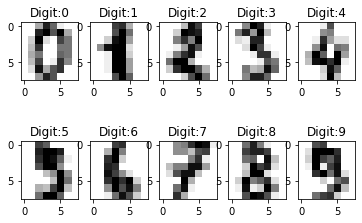

In [7]:
digits = datasets.load_digits()
print(digits.keys())

for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2,5, label+1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:%d'%label)

plt.show()

In [8]:
# 개별 데이터
label, img

(9,
 array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]))

In [20]:
# reshape train data (n, (8,8)) -> (n, 64) 
n_samples = len(images)
train_size = int(n_samples*2/3)
images = digits.images.reshape(n_samples,64)
labels = digits.target

train_x, train_y = images[:train_size], labels[:train_size]
test_x, test_y = images[train_size:], labels[train_size:]

print('train size :', train_size)
print('target : %d \n input : %d' %(len(label), len(images)))

train size : 1198
target : 1797 
 input : 1797


## 2. Modeling

In [21]:
# build and train
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3)

In [22]:
# predict test data set
pred_test = classifier.predict(test_x)

In [23]:
# accuracy score
acc = accuracy_score(test_y, pred_test)
acc

0.44908180300500833

**Confusion Matrix**
- 예측결과값 : predicted, 실제값: expected
- 혼동행렬 결과 (sklearn)
- 실제값(actual) 세로방향, 예측값(predicted) 가로방향
- 대각선으로 숫자가 몰려 있을 수록 좋은 모델이다.


In [24]:
# confusion matrix
cm_pred = confusion_matrix(test_y, pred_test)
cm_pred

array([[57,  0,  1,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 25, 16,  6,  0,  0, 15,  0,  0],
       [ 1,  0, 49,  6,  0,  1,  0,  3,  0,  0],
       [ 0,  0, 10, 46,  0,  0,  0,  5,  0,  1],
       [ 4,  0, 27,  0, 30,  0,  0,  1,  0,  0],
       [ 0,  0,  2, 29, 20,  5,  0,  3,  0,  0],
       [ 0,  0, 55,  5,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  0, 55,  0,  0],
       [ 0,  0, 33,  6,  2,  1,  0, 13,  0,  0],
       [ 2,  0,  1, 21,  7,  0,  0,  0,  0, 27]], dtype=int64)

In [27]:
# report
print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        59
           1       0.00      0.00      0.00        62
           2       0.24      0.82      0.37        60
           3       0.36      0.74      0.48        62
           4       0.42      0.48      0.45        62
           5       0.62      0.08      0.15        59
           6       0.00      0.00      0.00        61
           7       0.58      0.90      0.71        61
           8       0.00      0.00      0.00        55
           9       0.96      0.47      0.63        58

    accuracy                           0.45       599
   macro avg       0.41      0.45      0.37       599
weighted avg       0.41      0.45      0.37       599



C:\Users\GW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
